In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2022/players.csv
/kaggle/input/nfl-big-data-bowl-2022/PFFScoutingData.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2019.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2020.csv
/kaggle/input/nfl-big-data-bowl-2022/games.csv
/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv
/kaggle/input/nfl-big-data-bowl-2022/plays.csv


# <p style="text-align:center;"> ✨🏈 NFL Big Data Bowl - EDA 🏈✨  </p>

<div style="width:100%;text-align: center;"> <img align=middle src="https://cloudfront-us-east-1.images.arcpublishing.com/gray/42TKT722XJLFPFT45YL2PPSFS4.jpg" alt="Heat beating" style="height:300px;margin-top:3rem;">!</div>

**<p style="text-align:center;"> Beginner-friendly EDA notebook. More analyses and visualizations are on the way for future updates !! </p>**

# Upvote is Free 😇

**PLEASE UPVOTE if you like this EDA notebook.  It will keep me inspired to update my notebook.**

# IMPORTING LIBRARIES

In [2]:
import pandas as pd
from matplotlib import pyplot as plt 
import matplotlib.patches as patches
import plotly.express as px
import plotly.graph_objects as pg
from plotly import tools as tls

# <p style="text-align:center;"> ✨1. Player Data✨  </p>

**Player data:** The players.csv file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId.

* nflId: Player identification number, unique across players (numeric)
* Height: Player height (text)
* Weight: Player weight (numeric)
* birthDate: Date of birth (YYYY-MM-DD)
* collegeName: Player college (text)
* Position: Player position (text)
* displayName: Player name (text)

# Loading Data

In [3]:
player = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/players.csv')
print("Number of data points:", len(player))
print("Number of columns:", player.shape[1])
player.head()

Number of data points: 2732
Number of columns: 7


nflId height  weight   birthDate       collegeName Position  \
0  42901    6-1     208  1992-07-25     James Madison       SS   
1  43501    6-0     220  1994-08-11  Central Michigan       FS   
2  43534    6-0     205  1993-06-02          Illinois       SS   
3  43535    6-1     235  1992-12-22            Temple      MLB   
4  44174    6-1     236  1993-02-22        Texas Tech      ILB   

         displayName  
0       Dean Marlowe  
1      Kavon Frazier  
2  Clayton Fejedelem  
3   Tyler Matakevich  
4       Sam Eguavoen

# Data Cleaning

**We want to examine the dataset to know the steps taken to clean the dataset.**

In [4]:
# Dataset Summary
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


**From the above output, we can conclude that**

1. The birthDate and collegeName column has missing values.

2. Convert all heights from format feet - inch or inch to feet.

3. The birthDate column should be parsed as DateTime instead of Object.

4. Splitting YYYY (Year) from YYYY-MM-DD date format to calculate birth year of players.

5. Replacing abbrevated words with keywords in Position column.

# Eliminate Null Values

In [5]:
player = player.dropna()
print("The shape of the dataset after removing null values is : ", player.shape)

The shape of the dataset after removing null values is :  (2712, 7)


# Listing out unique values from height column

In [6]:
print("Unique height values and their counts :")
print(player["height"].value_counts())

Unique height values and their counts :
6-3     364
6-2     338
6-4     309
6-1     294
6-0     272
6-5     270
5-11    224
5-10    148
6-6     145
5-9      73
6-7      52
5-8      31
75       27
6-8      22
72       21
73       20
74       19
77       18
71       13
76       12
70        9
78        7
6-9       6
5-7       6
5-6       5
68        2
69        2
66        1
79        1
67        1
Name: height, dtype: int64


**From the above output, we can conclude that there are two formats in height values.**

1. Feet - Inch ( Ex: 6-3, 6-4 )
2. Inches ( Ex : 72, 78 )

# Feature Engineering - Converting all heights to feet

**Parsing Object as String and splitting height values (Ex: 6-3) into two (Ex: 6 Feet and 3 Inches)**

In [7]:
new_height = player["height"].str.split("-", n = 1, expand = True)
new_height.columns = ['Feet', 'Inch']
player["height_feet"] = pd.to_numeric(new_height["Feet"])
player["height_inch"] = pd.to_numeric(new_height["Inch"])
print("The shape of the dataset after feature engineering is : ", player.shape)
print(player)

The shape of the dataset after feature engineering is :  (2712, 9)
      nflId height  weight   birthDate          collegeName Position  \
0     42901    6-1     208  1992-07-25        James Madison       SS   
1     43501    6-0     220  1994-08-11     Central Michigan       FS   
2     43534    6-0     205  1993-06-02             Illinois       SS   
3     43535    6-1     235  1992-12-22               Temple      MLB   
4     44174    6-1     236  1993-02-22           Texas Tech      ILB   
...     ...    ...     ...         ...                  ...      ...   
2727  33216    6-3     320  06/16/1986      Central Florida        G   
2728  33184    6-3     265  05/02/1985  Winston-Salem State       DE   
2729  45651    5-9     198  06/16/1993                 Iowa       WR   
2730  41284     73     230  1992-10-20                  LSU       RB   
2731  42849   5-10     205  12/14/1992           Texas Tech       WR   

            displayName  height_feet  height_inch  
0          Dean 

**Converting Inches to Feet by multiplying inch value with 0.0833333 (Since 1 inch = 0.0833333 feet)**

In [8]:
# Column - height_feet
for i in player["height_feet"]:
    if i > 7:
        j = 0.0833333 * i
        player["height_feet"].replace({i : j}, inplace=True)
        
# Column - height_inch
player["height_inch"] = 0.0833333 * player["height_inch"]
print(player.tail())

      nflId height  weight   birthDate          collegeName Position  \
2727  33216    6-3     320  06/16/1986      Central Florida        G   
2728  33184    6-3     265  05/02/1985  Winston-Salem State       DE   
2729  45651    5-9     198  06/16/1993                 Iowa       WR   
2730  41284     73     230  1992-10-20                  LSU       RB   
2731  42849   5-10     205  12/14/1992           Texas Tech       WR   

          displayName  height_feet  height_inch  
2727      Josh Sitton     6.000000     0.250000  
2728    William Hayes     6.000000     0.250000  
2729   Riley McCarron     5.000000     0.750000  
2730      Jeremy Hill     6.083331          NaN  
2731  Bradley Marquez     5.000000     0.833333  


**Converting Nan values to zero in height_inch column to perform arithmetic operations**

In [9]:
for i in player["height_inch"]:
    player["height_inch"] = player["height_inch"].fillna(0)
print(player["height_inch"])

0       0.083333
1       0.000000
2       0.000000
3       0.083333
4       0.083333
          ...   
2727    0.250000
2728    0.250000
2729    0.750000
2730    0.000000
2731    0.833333
Name: height_inch, Length: 2712, dtype: float64


**Now inch values are converted into feet values.**
**The next step will be getting total feet values by adding height_inch & height_feet column.**

In [10]:
player["height_feet"] = player["height_feet"] + player["height_inch"]
print(player["height_feet"])

0       6.083333
1       6.000000
2       6.000000
3       6.083333
4       6.083333
          ...   
2727    6.250000
2728    6.250000
2729    5.750000
2730    6.083331
2731    5.833333
Name: height_feet, Length: 2712, dtype: float64


# Exploring height_feet Column

In [11]:
# Maximum and Minimum height of the players in feet
print("Maximum height of the player in feet : ",max(player["height_feet"]))
print("Minimum height of the player in feet : ",min(player["height_feet"]))

Maximum height of the player in feet :  6.7499997
Minimum height of the player in feet :  5.4999978


# Visualizing height_feet column by Histogram

In [12]:
# Creating Histogram plot
fig = px.histogram(player, x="height_feet", title="Player's Height In Feet", nbins=10, color_discrete_sequence=["royalblue"])

# Displaying Histogram plot
fig.show()

# Listing out unique values from weight column

In [13]:
print("Unique weight values and their counts :")
print(player["weight"].value_counts())

Unique weight values and their counts :
205    91
190    77
200    72
195    71
305    64
       ..
167     1
339     1
344     1
169     1
271     1
Name: weight, Length: 187, dtype: int64


**From the above output we can conclude that there is no anomaly (something that deviates from what is standard, normal, or expected)  and all weights are in lbs (pounds).**

# Exploring weight Column

In [14]:
# Maximum and Minimum weight of the players in lbs (pounds)
print("Maximum weight of the player in lbs (pounds) : ",max(player["weight"]))
print("Minimum weight of the player in lbs (pounds) : ",min(player["weight"]))

Maximum weight of the player in lbs (pounds) :  380
Minimum weight of the player in lbs (pounds) :  153


# Visualizing weight column by Histogram

In [15]:
# Creating Histogram plot
fig = px.histogram(player, x="weight", title="Player's Weight In lbs (pounds)", color_discrete_sequence=["darkblue"])

# Displaying Histogram plot
fig.show()

# Feature Engineering - Converting YYYY-MM-DD date format to YYYY (year) format

**Parsing Object as DateTime**

In [16]:
print("Data type of birthDate column before parsing : ", player["birthDate"].dtypes)
player["birthDate"] = pd.to_datetime(player["birthDate"])
print("Data type of birthDate column after parsing : ", player["birthDate"].dtypes)
print(player["birthDate"].head())

Data type of birthDate column before parsing :  object
Data type of birthDate column after parsing :  datetime64[ns]
0   1992-07-25
1   1994-08-11
2   1993-06-02
3   1992-12-22
4   1993-02-22
Name: birthDate, dtype: datetime64[ns]


**Splitting YYYY (Year) from YYYY-MM-DD date format**

In [17]:
player['birthYear'] = pd.DatetimeIndex(player['birthDate']).year
print(player["birthYear"])

0       1992
1       1994
2       1993
3       1992
4       1993
        ... 
2727    1986
2728    1985
2729    1993
2730    1992
2731    1992
Name: birthYear, Length: 2712, dtype: int64


# Listing out unique values from birthYear column

In [18]:
print("Unique birth year values and their counts :")
print(player["birthYear"].value_counts())

Unique birth year values and their counts :
1995    381
1994    336
1996    326
1993    279
1997    276
1992    255
1991    199
1990    151
1989    116
1998    106
1988     87
1987     63
1986     38
1999     28
1985     23
1984     15
1983     11
1981      7
1982      7
1980      3
1975      2
1978      2
1972      1
Name: birthYear, dtype: int64


**From the above output we can conclude that there is no anomaly (something that deviates from what is standard, normal, or expected)  and all date values are in YYYY format.**

# Exploring birthYear Column

In [19]:
# Newest and oldest player
print("Newest player birth year : ",max(player["birthYear"]))
print("Oldest player birth year : ",min(player["birthYear"]))

Newest player birth year :  1999
Oldest player birth year :  1972


# Visualizing birthYear column by Histogram

In [20]:
# Creating Histogram plot
fig = px.histogram(player, x="birthYear", title="Birth Year Of Players", color_discrete_sequence=["red"])

# Displaying Histogram plot
fig.show()

# Listing out unique values from collegeName column

In [21]:
print("Unique college names and their counts : ")
college_names = player.pivot_table(index = ['collegeName'], aggfunc = 'size') 
college_names = college_names.reset_index()
college_names.columns= ["College Names", "Counts"]
college_names = college_names.sort_values("Counts", ascending = False)
print(college_names)

Unique college names and their counts : 
            College Names  Counts
3                 Alabama      67
204            Ohio State      56
81                Florida      55
135       Louisiana State      51
92                Georgia      47
..                    ...     ...
88      Fort Valley State       1
90        Frostburg State       1
196     Northern Colorado       1
195      Northern Arizona       1
226  Saginaw Valley State       1

[322 rows x 2 columns]


# Visualizing arrangement of colleges from highest to lowest number of players  by Treemap plot

In [22]:
# Creating Treemap plot
fig = px.treemap(college_names, path=['College Names'], values='Counts', color='Counts', title="Arrangement Of Colleges From Highest To Lowest Number Of Players")

# Displaying Treemap plot
fig.show()

# Displaying top 10 colleges having higher number of players

In [23]:
top_colleges = college_names[0:10]
print(top_colleges)

       College Names  Counts
3            Alabama      67
204       Ohio State      56
81           Florida      55
135  Louisiana State      51
92           Georgia      47
152            Miami      45
212       Penn State      45
55           Clemson      44
202       Notre Dame      44
155         Michigan      44


# Visualizing top 10 colleges having higher number of players by Donut plot

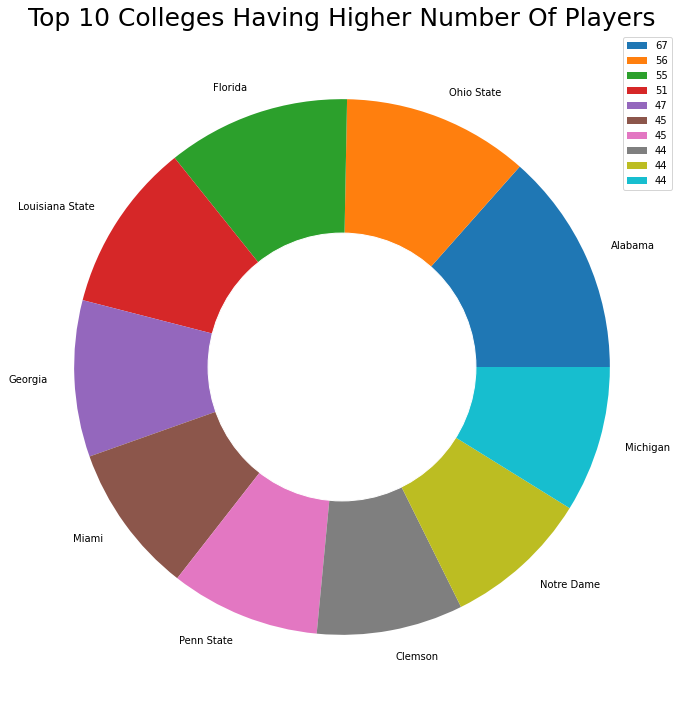

In [24]:
# Creating Donut Plot
fig = plt.figure(figsize = (12, 13)) 
circle = plt.Circle( (0,0), 0.5, color = 'white')
plt.pie(top_colleges["Counts"], labels = top_colleges["College Names"])
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend(top_colleges["Counts"])
plt.title("Top 10 Colleges Having Higher Number Of Players", fontsize=25)

# Displaying Donut Plot
plt.show() 

# Exploring Position column

**Replacing abbrevated words with keywords.**

In [25]:
player["Position"].replace({"WR": "Wide Receiver", "CB": "Corner Back", "DE": "Defensive End", "OLB": "Outside Linebacker",
                           "TE": "Tight End", "T": "Tackle", "RB": "Running Back", "G": "Guard", "DT": "Defensive Tackle",
                           "ILB": "Inside Linebacker", "FS": "Free Safety", "SS": "Strong Safety", "C": "Center", "K": "Kicker",
                           "P": "Punter", "NT": "Nose Tackle", "LS": "Long Snapper", "LB": "Linebacker", "DB": "Defensive Back",
                           "MLB" : "Middle Linebacker", "FB": "Full Back", "OT": "Offensive Tackle", "QB": "Quarter Back",
                           "OG": "Offensive guard", "S": "Safety", "HB": "Half Back"}, inplace=True)
print(player["Position"])

0           Strong Safety
1             Free Safety
2           Strong Safety
3       Middle Linebacker
4       Inside Linebacker
              ...        
2727                Guard
2728        Defensive End
2729        Wide Receiver
2730         Running Back
2731        Wide Receiver
Name: Position, Length: 2712, dtype: object


# Listing out unique values from position column

In [26]:
print("Unique position values and their counts :")
pos_val = player.pivot_table(index = ['Position'], aggfunc = 'size') 
pos_val = pos_val.reset_index()
pos_val.columns= ["Positions", "Counts"]
pos_val = pos_val.sort_values("Counts", ascending = False)
print(pos_val)

Unique position values and their counts :
             Positions  Counts
25       Wide Receiver     325
1          Corner Back     301
3        Defensive End     205
17  Outside Linebacker     198
24           Tight End     190
23              Tackle     188
20        Running Back     179
7                Guard     171
4     Defensive Tackle     165
9    Inside Linebacker     117
5          Free Safety     116
22       Strong Safety     103
0               Center      87
10              Kicker      56
18              Punter      49
14         Nose Tackle      48
12        Long Snapper      47
11          Linebacker      41
2       Defensive Back      39
13   Middle Linebacker      38
6            Full Back      27
15    Offensive Tackle       9
19        Quarter Back       8
16     Offensive guard       2
21              Safety       2
8            Half Back       1


# Visualizing frequently used to least used positions by Bar plot

In [27]:
#  Creating Bar plot
fig = px.bar(pos_val, x="Positions", y="Counts", title="Arrangement Of Positions From Frequently Used To Least Used", color=pos_val["Counts"])

# Displaying Bar plot
fig.show()

# Tabular Visualization

# Player data having highest height in feet

In [28]:
height = player[player['height_feet'] == max(player["height_feet"])]
height

nflId height  weight  birthDate           collegeName Position  \
305   53024    6-9     294 1997-04-29  South Carolina State   Tackle   
313   41222    6-9     320 1988-09-22                  Army   Tackle   
369   45721    6-9     325 1994-09-20              Arkansas   Tackle   
2392  42580    6-9     315 1992-08-21        Boston College   Tackle   
2411  35040    6-9     315 1985-10-11  Southern Mississippi   Tackle   
2598  43974    6-9     323 1992-05-14              Nebraska   Tackle   

               displayName  height_feet  height_inch  birthYear  
305            Alex Taylor         6.75         0.75       1997  
313   Alejandro Villanueva         6.75         0.75       1988  
369            Dan Skipper         6.75         0.75       1994  
2392         Brian Mihalik         6.75         0.75       1992  
2411          Demar Dotson         6.75         0.75       1985  
2598           Zach Sterup         6.75         0.75       1992

# Player data having lowest height in feet

In [29]:
low_height = player[player['height_feet'] == min(player["height_feet"])]
low_height

nflId height  weight  birthDate   collegeName      Position  \
2197  29957     66     190 1983-06-20  Kansas State  Running Back   

         displayName  height_feet  height_inch  birthYear  
2197  Darren Sproles     5.499998          0.0       1983

# Player data having highest weight in lbs

In [30]:
weight = player[player['weight'] == max(player["weight"])]
weight

nflId height  weight  birthDate collegeName Position    displayName  \
1115  42587    6-8     380 1993-04-13     Florida   Tackle  Trenton Brown   

      height_feet  height_inch  birthYear  
1115     6.666666     0.666666       1993

# Player data having highest weight in lbs

In [31]:
low_weight = player[player['weight'] == min(player["weight"])]
low_weight

nflId height  weight  birthDate collegeName       Position  displayName  \
1829  45150    5-7     153 1994-02-01       Akron  Wide Receiver  JoJo Natson   

      height_feet  height_inch  birthYear  
1829     5.583333     0.583333       1994

# Earliest player's data

In [32]:
earliest = player[player['birthYear'] == min(player["birthYear"])]
earliest

nflId height  weight  birthDate         collegeName Position  \
2134  21213     72     212 1972-12-28  South Dakota State   Kicker   

         displayName  height_feet  height_inch  birthYear  
2134  Adam Vinatieri     5.999998          0.0       1972

# Newest player's data

In [33]:
newest = player[player['birthYear'] == max(player["birthYear"])]
newest

nflId height  weight  birthDate          collegeName  \
18    52438   5-11     196 1999-11-27               Auburn   
21    52536    6-3     213 1999-03-01      Central Florida   
34    52426    6-6     310 1999-08-11  Southern California   
82    50756    6-2     202 1999-01-08        West Virginia   
107   52432    6-3     319 1999-06-14             Michigan   
153   52451    6-6     258 1999-03-10           Notre Dame   
287   52595    6-2     208 1999-02-19             Michigan   
304   52418    6-5     320 1999-05-17              Alabama   
570   52412    6-5     326 1999-01-22              Georgia   
595   52425    6-2     189 1999-04-08             Oklahoma   
705   52421    6-5     322 1999-01-24                 Iowa   
771   52589    6-3     307 1999-03-27         Fresno State   
790   52420    6-0     190 1999-01-24              Alabama   
1014  52541    6-7     251 1999-01-08             Stanford   
1071  52538    6-4     295 1999-01-20               Baylor   
1156  52436    6-1     227 1999-08-13      Louisiana State   
1243  52429   5-11     195 1999-01-02      Texas Christian   
1339  52505    6-4     233 1999-04-01      Louisiana State   
1393  52458    6-0     195 1999-04-19                 Utah   
1484  52454    5-9     176 1999-07-08           Penn State   
1515  52437    6-7     330 1999-02-12              Georgia   
1596  52443   5-10     211 1999-01-14              Georgia   
1599  52872    6-2     185 1999-02-23        Florida State   
1620  52627   5-11     210 1999-04-19                 Iowa   
1638  52650    6-4     250 1999-07-28                Miami   
1724  52509    6-4     251 1999-04-14        Virginia Tech   
1734  52428    6-4     250 1999-07-25      Louisiana State   
1831  52410    6-5     265 1999-04-14           Ohio State   

                Position            displayName  height_feet  height_inch  \
18           Corner Back       Noah Igbinoghene     5.916666     0.916666   
21         Wide Receiver          Gabriel Davis     6.250000     0.250000   
34                Tackle         Austin Jackson     6.500000     0.500000   
82           Free Safety         Kenny Robinson     6.166667     0.166667   
107                Guard             Cesar Ruiz     6.250000     0.250000   
153            Tight End              Cole Kmet     6.500000     0.500000   
287        Wide Receiver  Donovan Peoples-Jones     6.166667     0.166667   
304               Tackle          Jedrick Wills     6.416666     0.416666   
570               Tackle          Andrew Thomas     6.416666     0.416666   
595        Wide Receiver            CeeDee Lamb     6.166667     0.166667   
705               Tackle          Tristan Wirfs     6.416666     0.416666   
771                Guard            Netane Muti     6.250000     0.250000   
790        Wide Receiver            Henry Ruggs     6.000000     0.000000   
1014           Tight End        Colby Parkinson     6.583333     0.583333   
1071    Defensive Tackle            James Lynch     6.333333     0.333333   
1156   Middle Linebacker          Patrick Queen     6.083333     0.083333   
1243       Wide Receiver           Jalen Reagor     5.916666     0.916666   
1339  Outside Linebacker         Jacob Phillips     6.333333     0.333333   
1393         Corner Back         Jaylon Johnson     6.000000     0.000000   
1484       Wide Receiver            K.J. Hamler     5.750000     0.750000   
1515              Tackle          Isaiah Wilson     6.583333     0.583333   
1596        Running Back          D'Andre Swift     5.833333     0.833333   
1599      Defensive Back       Stanford Samuels     6.166667     0.166667   
1620         Free Safety             Geno Stone     5.916666     0.916666   
1638  Outside Linebacker        Jonathan Garvin     6.333333     0.333333   
1724           Tight End           Dalton Keene     6.333333     0.333333   
1734       Defensive End       K'Lavon Chaisson     6.333333     0.333333   
1831       Defensive End            Chase Young    

# <p style="text-align:center;"> ✨2. Games Data✨  </p>

**Game data:** The games.csv contains the teams playing in each game. The key variable is gameId.
* gameId: Game identifier, unique (numeric)
* season: Season of game
* week: Week of game
* gameDate: Game Date (time, mm/dd/yyyy)
* gameTimeEastern: Start time of game (time, HH:MM:SS, EST)
* homeTeamAbbr: Home team three-letter code (text)
* visitorTeamAbbr: Visiting team three-letter code (text)

# Loading Data

In [34]:
games = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/games.csv')
print("Number of data points:", len(games))
print("Number of columns:", games.shape[1])
games

Number of data points: 764
Number of columns: 7


gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
0    2018090600    2018     1  09/06/2018        20:20:00          PHI   
1    2018090900    2018     1  09/09/2018        13:00:00          BAL   
2    2018090901    2018     1  09/09/2018        13:00:00          CLE   
3    2018090902    2018     1  09/09/2018        13:00:00          IND   
4    2018090903    2018     1  09/09/2018        13:00:00          MIA   
..          ...     ...   ...         ...             ...          ...   
759  2021010311    2020    17  01/03/2021        16:25:00          DEN   
760  2021010312    2020    17  01/03/2021        16:25:00          HOU   
761  2021010313    2020    17  01/03/2021        16:25:00          IND   
762  2021010314    2020    17  01/03/2021        16:25:00           LA   
763  2021010315    2020    17  01/03/2021        16:25:00           SF   

    visitorTeamAbbr  
0               ATL  
1               BUF  
2               PIT  
3               CIN  
4               TEN  
..              ...  
759              LV  
760             TEN  
761             JAX  
762             ARI  
763             SEA  

[764 rows x 7 columns]

# Data Cleaning

**We want to examine the dataset to know the steps taken to clean the dataset.**

In [35]:
# Dataset Summary
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           764 non-null    int64 
 1   season           764 non-null    int64 
 2   week             764 non-null    int64 
 3   gameDate         764 non-null    object
 4   gameTimeEastern  764 non-null    object
 5   homeTeamAbbr     764 non-null    object
 6   visitorTeamAbbr  764 non-null    object
dtypes: int64(3), object(4)
memory usage: 41.9+ KB


**From the above output, we can conclude that**

1. The gameDate column should be parsed as DateTime instead of Object.

2. Splitting MM (Month), DD (Date) & YYYY (Year) from MM/DD/YYYY date format.

3. Converting MM (Month) into Month name.

4. Splitting HH (Hour) from HH:MM:SS time format.

5. Replacing abbrevated words with keywords in homeTeamAbbr and visitorTeamAbbr column.

# Listing out unique values from season column

In [36]:
print("Unique NFL seasons and their counts :")
g_season = games.pivot_table(index = ['season'], aggfunc = 'size') 
g_season = g_season.reset_index()
g_season.columns= ["Seasons", "Counts"]
g_season = g_season.sort_values("Counts", ascending = False)
print(g_season)

Unique NFL seasons and their counts :
   Seasons  Counts
2     2020     256
1     2019     255
0     2018     253


# Visualizing NFL seasons by Bar plot

In [37]:
# Creating Bar plot
fig = px.bar(g_season, x="Seasons", y="Counts", title="NFL Seasons", color="Seasons")

# Displaying Bar plot
fig.show()

# Listing out unique values from week column

In [38]:
print("Unique NFL weeks and their counts :")
g_week = games.pivot_table(index = ['week'], aggfunc = 'size') 
g_week = g_week.reset_index()
g_week.columns= ["Weeks", "Counts"]
g_week = g_week.sort_values("Counts", ascending = False)
print(g_week)

Unique NFL weeks and their counts :
    Weeks  Counts
16     17      48
1       2      48
2       3      48
15     16      48
14     15      48
13     14      48
12     13      47
11     12      45
0       1      45
4       5      44
3       4      44
7       8      43
5       6      43
6       7      42
9      10      41
10     11      41
8       9      41


# Visualizing NFL weeks by Bar plot

In [39]:
# Creating Bar plot
fig = px.bar(g_week, x="Weeks", y="Counts", title="NFL Weeks", color="Weeks")

# Displaying Bar plot
fig.show()

# Listing out unique values from week column

In [40]:
print("Unique NFL dates and their counts :")
g_date = games.pivot_table(index = ['gameDate'], aggfunc = 'size') 
g_date = g_date.reset_index()
g_date.columns= ["Date", "Counts"]
g_date = g_date.sort_values("Counts", ascending = False)
print(g_date)

Unique NFL dates and their counts :
           Date  Counts
0    01/03/2021      16
149  12/29/2019      16
150  12/30/2018      16
22   09/23/2018      14
19   09/20/2020      14
..          ...     ...
79   11/05/2020       1
78   11/05/2018       1
1    09/05/2019       1
74   11/02/2020       1
77   11/04/2019       1

[151 rows x 2 columns]


# Visualizing NFL dates by Bar plot

In [41]:
# Creating Bar plot
fig = px.bar(g_date, x="Date", y="Counts", title='Dates On Which NFL Events Occurred', color="Counts")

# Displaying Bar plot
fig.show()

# Feature Engineering - Splitting MM (Month), DD (Date) & YYYY (Year) from MM/DD/YYYY date format

**Parsing Object as DateTime**

In [42]:
print("Data type of gameDate column before parsing : ", games["gameDate"].dtypes)
games["gameDate"] = pd.to_datetime(games["gameDate"])
print("Data type of gameDate column after parsing : ", games["gameDate"].dtypes)
print(games["gameDate"].head())

Data type of gameDate column before parsing :  object
Data type of gameDate column after parsing :  datetime64[ns]
0   2018-09-06
1   2018-09-09
2   2018-09-09
3   2018-09-09
4   2018-09-09
Name: gameDate, dtype: datetime64[ns]


**Splitting YYYY (Year) from MM/DD/YYYY date format**

In [43]:
games['gameYear'] = pd.DatetimeIndex(games['gameDate']).year
print(games["gameYear"])

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
759    2021
760    2021
761    2021
762    2021
763    2021
Name: gameYear, Length: 764, dtype: int64


# Listing out unique values from year column

In [44]:
print("Unique NFL years and their counts :")
g_year = games.pivot_table(index = ['gameYear'], aggfunc = 'size') 
g_year = g_year.reset_index()
g_year.columns= ["Year", "Counts"]
g_year = g_year.sort_values("Counts", ascending = False)
print(g_year)

Unique NFL years and their counts :
   Year  Counts
1  2019     255
0  2018     253
2  2020     240
3  2021      16


# Visualizing NFL years by Bar plot

In [45]:
# Creating Bar plot
fig = px.bar(g_year, x="Year", y="Counts", title="Distinct Count Of NFL Event Years", color="Year")

# Displaying Bar plot
fig.show()

**Splitting MM (Month) from MM/DD/YYYY date format and converting it into Month name**

In [46]:
games["gameMonthName"] = games["gameDate"].dt.month_name()
print(games["gameMonthName"])

0      September
1      September
2      September
3      September
4      September
         ...    
759      January
760      January
761      January
762      January
763      January
Name: gameMonthName, Length: 764, dtype: object


# Listing out unique values from month name column

In [47]:
print("Unique NFL months and their counts :")
g_month = games.pivot_table(index = ['gameMonthName'], aggfunc = 'size') 
g_month = g_month.reset_index()
g_month.columns= ["Month", "Counts"]
g_month = g_month.sort_values("Counts", ascending = False)
print(g_month)

Unique NFL months and their counts :
       Month  Counts
0   December     220
2   November     183
3    October     176
4  September     169
1    January      16


# Visualizing NFL months by Bar plot

In [48]:
# Creating Bar plot
fig = px.bar(g_month, x="Month", y="Counts", title="Distinct Count Of NFL Event Months", color="Month")

# Displaying Bar plot
fig.show()

**Splitting DD (Date) from MM/DD/YYYY date format**

In [49]:
games['gameDay'] = pd.DatetimeIndex(games['gameDate']).day
print(games["gameDay"])

0      6
1      9
2      9
3      9
4      9
      ..
759    3
760    3
761    3
762    3
763    3
Name: gameDay, Length: 764, dtype: int64


# Listing out unique values from day column

In [50]:
print("Unique NFL days and their counts :")
g_days = games.pivot_table(index = ['gameDay'], aggfunc = 'size') 
g_days = g_days.reset_index()
g_days.columns= ["Day", "Counts"]
g_days = g_days.sort_values("Counts", ascending = False)
print(g_days)

Unique NFL days and their counts :
    Day  Counts
21   22      45
14   15      44
28   29      43
7     8      43
12   13      42
26   27      39
19   20      39
29   30      31
2     3      30
22   23      30
15   16      29
8     9      28
0     1      27
5     6      27
24   25      26
3     4      25
17   18      25
10   11      25
20   21      19
13   14      18
27   28      18
6     7      17
9    10      17
16   17      17
1     2      17
23   24      16
25   26       8
18   19       7
4     5       6
11   12       5
30   31       1


# Visualizing NFL days by Bar plot

In [51]:
# Creating Bar plot
fig = px.bar(g_days, x="Day", y="Counts", title="Distinct Count Of NFL Event Days", color="Counts")

# Displaying Bar plot
fig.show()

# Listing out unique values from gameTimeEastern column

In [52]:
print("Unique NFL timings and their counts :")
g_time = games.pivot_table(index = ['gameTimeEastern'], aggfunc = 'size') 
g_time = g_time.reset_index()
g_time.columns= ["Time", "Counts"]
g_time = g_time.sort_values("Counts", ascending = False)
print(g_time)

Unique NFL timings and their counts :
        Time  Counts
2   13:00:00     403
5   16:25:00     119
13  20:20:00      95
4   16:05:00      71
12  20:15:00      47
6   16:30:00       9
0   09:30:00       4
1   12:30:00       3
10  19:10:00       3
15  22:20:00       3
7   17:00:00       2
3   15:40:00       1
8   19:00:00       1
9   19:05:00       1
11  20:05:00       1
14  21:00:00       1


# Visualizing NFL timings by Bar plot

In [53]:
# Creating Bar plot
fig = px.bar(g_time, x="Time", y="Counts", title="Distinct Count Of NFL Event Timings", color="Counts")

# Displaying Bar plot
fig.show()

**Splitting HH (Hour) from HH:MM:SS time format**

In [54]:
games["hour"] = pd.to_datetime(games["gameTimeEastern"], format="%H:%M:%S").dt.hour
print(games["hour"])

0      20
1      13
2      13
3      13
4      13
       ..
759    16
760    16
761    16
762    16
763    16
Name: hour, Length: 764, dtype: int64


# Listing out unique values from hour column

In [55]:
print("Unique NFL hours and their counts :")
g_hour = games.pivot_table(index = ['hour'], aggfunc = 'size') 
g_hour = g_hour.reset_index()
g_hour.columns= ["Hour", "Counts"]
g_hour = g_hour.sort_values("Counts", ascending = False)
print(g_hour)

Unique NFL hours and their counts :
   Hour  Counts
2    13     403
4    16     199
7    20     143
6    19       5
0     9       4
1    12       3
9    22       3
5    17       2
3    15       1
8    21       1


# Visualizing NFL hours by Bar plot

In [56]:
# Creating Bar plot
fig = px.bar(g_hour, x="Hour", y="Counts", title="Distinct Count Of NFL Event Hours", color="Counts")

# Displaying Bar plot
fig.show()

# Exploring homeTeamAbbr column

**Replacing abbrevated words with keywords.**

In [57]:
games["homeTeamAbbr"].replace({"ARI": "Arizona Cardinals", "KC": "Kansas City Chiefs", "TEN": "Tennessee Titans", "TB": "Tampa Bay Buccaneers",
                           "SF": "San Francisco 49ers", "SEA": "Seattle Seahawks", "PIT": "Pittsburgh Steelers", "PHI": "Philadelphia Eagles",
                            "NYJ": "New York Jets", "NYG": "New York Giants", "NO": "New Orleans Saints", "NE": "New England Patriots", 
                             "MIA": "Miami Dolphins", "ATL": "Atlanta Falcons", "LA": "Los Angeles Rams", "JAX": "Jacksonville Jaguars", 
                             "IND": "Indianapolis Colts", "BAL": "Baltimore Ravens", "BUF": "Buffalo Bills", "CAR": "Carolina Panthers", 
                             "CIN": "Cincinnati Bengals", "CLE": "Cleveland Browns", "DAL": "Dallas Cowboys", "DET": "Detroit Lions", 
                             "GB": "Green Bay Packers", "HOU": "Houston Texans", "WAS": "Washington Football Team", "DEN": "Denver Broncos", 
                             "MIN": "Minnesota Vikings", "CHI": "Chicago Bears", "LAC": "Los Angeles Chargers", "OAK": "Oakland Raiders", 
                             "LV": "Las Vegas Raiders"}, inplace=True)
print(games["homeTeamAbbr"])

0      Philadelphia Eagles
1         Baltimore Ravens
2         Cleveland Browns
3       Indianapolis Colts
4           Miami Dolphins
              ...         
759         Denver Broncos
760         Houston Texans
761     Indianapolis Colts
762       Los Angeles Rams
763    San Francisco 49ers
Name: homeTeamAbbr, Length: 764, dtype: object


# Listing out unique values from homeTeamAbbr column

In [58]:
print("Unique NFL home teams and their counts :")
g_home = games.pivot_table(index = ['homeTeamAbbr'], aggfunc = 'size') 
g_home = g_home.reset_index()
g_home.columns= ["Home Team", "Counts"]
g_home = g_home.sort_values("Counts", ascending = False)
print(g_home)

Unique NFL home teams and their counts :
                   Home Team  Counts
0          Arizona Cardinals      24
15        Kansas City Chiefs      24
31          Tennessee Titans      24
30      Tampa Bay Buccaneers      24
29          Seattle Seahawks      24
28       San Francisco 49ers      24
27       Pittsburgh Steelers      24
26       Philadelphia Eagles      24
24             New York Jets      24
23           New York Giants      24
22        New Orleans Saints      24
21      New England Patriots      24
19            Miami Dolphins      24
18          Los Angeles Rams      24
1            Atlanta Falcons      24
32  Washington Football Team      24
14      Jacksonville Jaguars      24
7           Cleveland Browns      24
2           Baltimore Ravens      24
3              Buffalo Bills      24
4          Carolina Panthers      24
6         Cincinnati Bengals      24
8             Dallas Cowboys      24
10             Detroit Lions      24
11         Green Bay Packers      

# Visualizing NFL Home Teams by Bar plot

In [59]:
# Creating Bar plot
fig = px.bar(g_home, x="Home Team", y="Counts", title="Distinct Count Of NFL Home Teams", color="Counts")

# Displaying Bar plot
fig.show()

# Exploring visitorTeamAbbr column

**Replacing abbrevated words with keywords.**


In [60]:
games["visitorTeamAbbr"].replace({"ARI": "Arizona Cardinals", "KC": "Kansas City Chiefs", "TEN": "Tennessee Titans", "TB": "Tampa Bay Buccaneers",
                           "SF": "San Francisco 49ers", "SEA": "Seattle Seahawks", "PIT": "Pittsburgh Steelers", "PHI": "Philadelphia Eagles",
                            "NYJ": "New York Jets", "NYG": "New York Giants", "NO": "New Orleans Saints", "NE": "New England Patriots", 
                             "MIA": "Miami Dolphins", "ATL": "Atlanta Falcons", "LA": "Los Angeles Rams", "JAX": "Jacksonville Jaguars", 
                             "IND": "Indianapolis Colts", "BAL": "Baltimore Ravens", "BUF": "Buffalo Bills", "CAR": "Carolina Panthers", 
                             "CIN": "Cincinnati Bengals", "CLE": "Cleveland Browns", "DAL": "Dallas Cowboys", "DET": "Detroit Lions", 
                             "GB": "Green Bay Packers", "HOU": "Houston Texans", "WAS": "Washington Football Team", "DEN": "Denver Broncos", 
                             "MIN": "Minnesota Vikings", "CHI": "Chicago Bears", "LAC": "Los Angeles Chargers", "OAK": "Oakland Raiders", 
                             "LV": "Las Vegas Raiders"}, inplace=True)
print(games["visitorTeamAbbr"])

0           Atlanta Falcons
1             Buffalo Bills
2       Pittsburgh Steelers
3        Cincinnati Bengals
4          Tennessee Titans
               ...         
759       Las Vegas Raiders
760        Tennessee Titans
761    Jacksonville Jaguars
762       Arizona Cardinals
763        Seattle Seahawks
Name: visitorTeamAbbr, Length: 764, dtype: object


# Listing out unique values from visitorTeamAbbr column

In [61]:
print("Unique NFL visitor teams and their counts :")
g_visit = games.pivot_table(index = ['visitorTeamAbbr'], aggfunc = 'size') 
g_visit = g_visit.reset_index()
g_visit.columns= ["Visitor Team", "Counts"]
g_visit = g_visit.sort_values("Counts", ascending = False)
print(g_visit)

Unique NFL visitor teams and their counts :
                Visitor Team  Counts
0          Arizona Cardinals      24
14      Jacksonville Jaguars      24
31          Tennessee Titans      24
30      Tampa Bay Buccaneers      24
27       Pittsburgh Steelers      24
26       Philadelphia Eagles      24
24             New York Jets      24
23           New York Giants      24
22        New Orleans Saints      24
21      New England Patriots      24
19            Miami Dolphins      24
18          Los Angeles Rams      24
17      Los Angeles Chargers      24
1            Atlanta Falcons      24
32  Washington Football Team      24
6         Cincinnati Bengals      24
12            Houston Texans      24
11         Green Bay Packers      24
10             Detroit Lions      24
2           Baltimore Ravens      24
9             Denver Broncos      24
8             Dallas Cowboys      24
7           Cleveland Browns      24
13        Indianapolis Colts      24
3              Buffalo Bills   

# Visualizing NFL Visitor Teams by Bar plot

In [62]:
# Creating Bar plot
fig = px.bar(g_visit, x="Visitor Team", y="Counts", title="Distinct Count Of NFL Visitor Teams", color="Counts")

# Displaying Bar plot
fig.show()

# <p style="text-align:center;"> ✨3. Play Data✨  </p>

**Play data:** The plays.csv file contains play-level information from each game. The key variables are gameId and playId.
* gameId: Game identifier, unique (numeric)
* playId: Play identifier, not unique across games (numeric)
* playDescription: Description of play (text)
* quarter: Game quarter (numeric)
* down: Down (numeric)
* yardsToGo: Distance needed for a first down (numeric)
* possessionTeam: Team punting, placekicking or kicking off the ball (text)
* specialTeamsPlayType: Formation of play: Extra Point, Field Goal, Kickoff or Punt (text)
* specialTeamsResult: Special Teams outcome of play dependent on play type: Blocked Kick Attempt, Blocked Punt, Downed, Fair Catch, Kick Attempt Good, Kick Attempt No Good, Kickoff Team Recovery, Muffed, Non-Special Teams Result, Out of Bounds, Return or Touchback (text)
* kickerId: nflId of placekicker, punter or kickoff specialist on play (numeric)
* returnerId: nflId(s) of returner(s) on play if there was a special teams return. Multiple returners on a play are separated by a ; (text)
* kickBlockerId: nflId of blocker of kick on play if there was a blocked field goal or blocked punt (numeric)
* yardlineSide: 3-letter team code corresponding to line-of-scrimmage (text)
* yardlineNumber: Yard line at line-of-scrimmage (numeric)
* gameClock: Time on clock of play (MM:SS)
* penaltyCodes: NFL categorization of the penalties that occurred on the play. A standard penalty code followed by a d means the penalty was on the defense. Multiple penalties on a play are separated by a ; (text)
* penaltyJerseyNumber: Jersey number and team code of the player committing each penalty. Multiple penalties on a play are separated by a ; (text)
* penaltyYards: yards gained by possessionTeam by penalty (numeric)
* preSnapHomeScore: Home score prior to the play (numeric)
* preSnapVisitorScore: Visiting team score prior to the play (numeric)
* passResult: Scrimmage outcome of the play if specialTeamsPlayResult is "Non-Special Teams Result" (C: Complete pass, I: Incomplete pass, S: Quarterback sack, IN: Intercepted pass, R: Scramble, ' ': Designed Rush, text)
* kickLength: Kick length in air of kickoff, field goal or punt (numeric)
* kickReturnYardage: Yards gained by return team if there was a return on a kickoff or punt (numeric)
* playResult: Net yards gained by the kicking team, including penalty yardage (numeric)
* absoluteYardlineNumber: Location of ball downfield in tracking data coordinates (numeric)

# Loading Data

In [63]:
play = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/plays.csv')
print("Number of data points:", len(play))
print("Number of columns:", play.shape[1])
play.head()

Number of data points: 19979
Number of columns: 25


gameId  playId                                    playDescription  \
0  2018090600      37  J.Elliott kicks 65 yards from PHI 35 to end zo...   
1  2018090600     366  (9:20) C.Johnston punts 56 yards to ATL 36, Ce...   
2  2018090600     658  (5:03) M.Bryant 21 yard field goal is GOOD, Ce...   
3  2018090600     677  M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...   
4  2018090600     872  (:33) C.Johnston punts 65 yards to end zone, C...   

   quarter  down  yardsToGo possessionTeam specialTeamsPlayType  \
0        1     0          0            PHI              Kickoff   
1        1     4          4            PHI                 Punt   
2        1     4          3            ATL           Field Goal   
3        1     0          0            ATL              Kickoff   
4        1     4         18            PHI                 Punt   

  specialTeamsResult  kickerId  ... penaltyCodes  penaltyJerseyNumbers  \
0          Touchback   44966.0  ...          NaN                   NaN   
1             Return   45603.0  ...         UNSd                PHI 18   
2  Kick Attempt Good   27091.0  ...          NaN                   NaN   
3             Return   37267.0  ...          NaN                   NaN   
4          Touchback   45603.0  ...          NaN                   NaN   

  penaltyYards  preSnapHomeScore preSnapVisitorScore passResult kickLength  \
0          NaN                 0                   0        NaN       66.0   
1        -15.0                 0                   0        NaN       56.0   
2          NaN                 0                   0        NaN       21.0   
3          NaN                 0                   3        NaN       64.0   
4          NaN                 0                   3        NaN       65.0   

   kickReturnYardage  playResult  absoluteYardlineNumber  
0                NaN          40                      45  
1                5.0          36                      18  
2                NaN           0                      13  
3               30.0          34                      75  
4                NaN          45                      45  

[5 rows x 25 columns]

# Data Cleaning

**We want to examine the dataset to know the steps taken to clean the dataset.**


In [64]:
# Dataset Summary
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

**From the above output, we can conclude that**

1. The kickerId, returnerId, kickBlockerId, yardlineSide, penaltyCodes, penaltyJerseyNumbers, penaltyYards, passResult, kickLength and kickReturnYardage column has missing values.

2. Replacing abbrevated words with keywords in possessionTeam and yardlineSide column.

3. Splitting HH (Hour) from HH:MM:SS time format.

# Eliminate Null Values

In [65]:
play_null = play.dropna()
print("The shape of the dataset after removing null values is : ", play_null.shape)

The shape of the dataset after removing null values is :  (0, 25)


**From the above output, we can conclude that if we remove rows containing null values then there would be no data. So we do EDA by omitting the null values.**

# Listing out unique values from quarter column

In [66]:
print("Unique NFL game quarter values and their counts :")
play_qrtr = play.pivot_table(index = ['quarter'], aggfunc = 'size') 
play_qrtr = play_qrtr.reset_index()
play_qrtr.columns= ["Quarter", "Counts"]
play_qrtr = play_qrtr.sort_values("Counts", ascending = False)
print(play_qrtr)

Unique NFL game quarter values and their counts :
   Quarter  Counts
1        2    5661
0        1    4781
2        3    4724
3        4    4711
4        5     102


# Visualizing NFL game quarters by Bar plot

In [67]:
# Creating Bar plot
fig = px.bar(play_qrtr, x="Quarter", y="Counts", title="Distinct Count Of NFL Game Quarters", color="Quarter")

# Displaying Bar plot
fig.show()

# Listing out unique values from down column

In [68]:
print("Unique NFL game downs and their counts :")
g_down = play.pivot_table(index = ['down'], aggfunc = 'size') 
g_down = g_down.reset_index()
g_down.columns= ["Down", "Counts"]
g_down = g_down.sort_values("Counts", ascending = False)
print(g_down)

Unique NFL game downs and their counts :
   Down  Counts
0     0   11331
4     4    8409
2     2      88
1     1      79
3     3      72


# Visualizing NFL game downs by Bar plot

In [69]:
# Creating Bar plot
fig = px.bar(g_down, x="Down", y="Counts", title="Distinct Count Of NFL Game Downs", color="Down")

# Displaying Bar plot
fig.show()

# Listing out unique values from yardsToGo column

In [70]:
print("Unique NFL yards to go and their counts :")
g_yards = play.pivot_table(index = ['yardsToGo'], aggfunc = 'size') 
g_yards = g_yards.reset_index()
g_yards.columns= ["Yards To Go", "Counts"]
g_yards = g_yards.sort_values("Counts", ascending = False)
print(g_yards)

Unique NFL yards to go and their counts :
    Yards To Go  Counts
0             0   11331
10           10     771
7             7     694
5             5     687
6             6     655
4             4     647
3             3     610
8             8     570
9             9     538
2             2     498
1             1     458
11           11     333
12           12     316
15           15     274
13           13     269
14           14     254
16           16     207
17           17     181
18           18     138
19           19     117
20           20     115
21           21      72
22           22      50
23           23      41
24           24      38
25           25      27
26           26      21
27           27      17
28           28      17
31           31       8
29           29       7
32           32       5
33           34       4
30           30       3
35           41       3
34           35       1
36           42       1
37           46       1


# Visualizing NFL yards to go by Bar plot

In [71]:
# Creating Bar plot
fig = px.bar(g_yards, x="Yards To Go", y="Counts", title="Distinct Count Of Yards To Go In NFL Game", color="Yards To Go")

# Displaying Bar plot
fig.show()

# Exploring possessionTeam column

**Replacing abbrevated words with keywords.**

In [72]:
play["possessionTeam"].replace({"ARI": "Arizona Cardinals", "KC": "Kansas City Chiefs", "TEN": "Tennessee Titans", "TB": "Tampa Bay Buccaneers",
                           "SF": "San Francisco 49ers", "SEA": "Seattle Seahawks", "PIT": "Pittsburgh Steelers", "PHI": "Philadelphia Eagles",
                            "NYJ": "New York Jets", "NYG": "New York Giants", "NO": "New Orleans Saints", "NE": "New England Patriots", 
                             "MIA": "Miami Dolphins", "ATL": "Atlanta Falcons", "LA": "Los Angeles Rams", "JAX": "Jacksonville Jaguars", 
                             "IND": "Indianapolis Colts", "BAL": "Baltimore Ravens", "BUF": "Buffalo Bills", "CAR": "Carolina Panthers", 
                             "CIN": "Cincinnati Bengals", "CLE": "Cleveland Browns", "DAL": "Dallas Cowboys", "DET": "Detroit Lions", 
                             "GB": "Green Bay Packers", "HOU": "Houston Texans", "WAS": "Washington Football Team", "DEN": "Denver Broncos", 
                             "MIN": "Minnesota Vikings", "CHI": "Chicago Bears", "LAC": "Los Angeles Chargers", "OAK": "Oakland Raiders", 
                             "LV": "Las Vegas Raiders"}, inplace=True)
print(play["possessionTeam"])

0        Philadelphia Eagles
1        Philadelphia Eagles
2            Atlanta Falcons
3            Atlanta Falcons
4        Philadelphia Eagles
                ...         
19974       Seattle Seahawks
19975       Seattle Seahawks
19976       Seattle Seahawks
19977    San Francisco 49ers
19978    San Francisco 49ers
Name: possessionTeam, Length: 19979, dtype: object


# Listing out unique values from possessionTeam column

In [73]:
print("Unique NFL possession teams and their counts :")
p_team = play.pivot_table(index = ['possessionTeam'], aggfunc = 'size') 
p_team = p_team.reset_index()
p_team.columns= ["Possession Team", "Counts"]
p_team = p_team.sort_values("Counts", ascending = False)
print(p_team)

Unique NFL possession teams and their counts :
             Possession Team  Counts
2           Baltimore Ravens     682
22        New Orleans Saints     682
18          Los Angeles Rams     676
30      Tampa Bay Buccaneers     672
15        Kansas City Chiefs     659
11         Green Bay Packers     653
21      New England Patriots     652
29          Seattle Seahawks     648
12            Houston Texans     648
31          Tennessee Titans     637
13        Indianapolis Colts     637
27       Pittsburgh Steelers     636
3              Buffalo Bills     631
1            Atlanta Falcons     627
19            Miami Dolphins     625
5              Chicago Bears     621
10             Detroit Lions     618
0          Arizona Cardinals     618
24             New York Jets     616
8             Dallas Cowboys     613
7           Cleveland Browns     610
28       San Francisco 49ers     606
17      Los Angeles Chargers     604
6         Cincinnati Bengals     601
9             Denver Broncos

# Visualizing NFL Possession Teams by Bar plot

In [74]:
# Creating Bar plot
fig = px.bar(p_team, x="Possession Team", y="Counts", title="Distinct Count Of NFL Possession Teams", color="Counts")

# Displaying Bar plot
fig.show()


# Listing out unique values from specialTeamsPlayType column

In [75]:
print("Unique NFL special teams play type and their counts :")
gp_type = play.pivot_table(index = ['specialTeamsPlayType'], aggfunc = 'size') 
gp_type = gp_type.reset_index()
gp_type.columns= ["Special Teams Play Type", "Counts"]
gp_type = gp_type.sort_values("Counts", ascending = False)
print(gp_type)

Unique NFL special teams play type and their counts :
  Special Teams Play Type  Counts
2                 Kickoff    7843
3                    Punt    5991
0             Extra Point    3488
1              Field Goal    2657


# Visualizing NFL Special Teams play type by Bar plot

In [76]:
# Creating Bar plot
fig = px.bar(gp_type, x="Special Teams Play Type", y="Counts", title="Distinct Count Of NFL Special Teams Play Type", color="Counts")

# Displaying Bar plot
fig.show()

# Listing out unique values from specialTeamsResult column

In [77]:
print("Unique NFL special teams result and their counts :")
gp_res = play.pivot_table(index = ['specialTeamsResult'], aggfunc = 'size') 
gp_res = gp_res.reset_index()
gp_res.columns= ["Special Teams Result", "Counts"]
gp_res = gp_res.sort_values("Counts", ascending = False)
print(gp_res)

Unique NFL special teams result and their counts :
        Special Teams Result  Counts
4          Kick Attempt Good    5470
10                    Return    5207
11                 Touchback    5156
3                 Fair Catch    1645
2                     Downed     834
9              Out of Bounds     651
5       Kick Attempt No Good     585
7                     Muffed     214
8   Non-Special Teams Result     101
0       Blocked Kick Attempt      61
1               Blocked Punt      39
6      Kickoff Team Recovery      16


# Visualizing NFL Special Teams result by Bar plot

In [78]:
# Creating Bar plot
fig = px.bar(gp_res, x="Special Teams Result", y="Counts", title="Distinct Count Of NFL Special Teams Result", color="Counts")

# Displaying Bar plot
fig.show()

# Exploring yardline side column

**Replacing abbrevated words with keywords.**

In [79]:
play["yardlineSide"].replace({"ARI": "Arizona Cardinals", "KC": "Kansas City Chiefs", "TEN": "Tennessee Titans", "TB": "Tampa Bay Buccaneers",
                           "SF": "San Francisco 49ers", "SEA": "Seattle Seahawks", "PIT": "Pittsburgh Steelers", "PHI": "Philadelphia Eagles",
                            "NYJ": "New York Jets", "NYG": "New York Giants", "NO": "New Orleans Saints", "NE": "New England Patriots", 
                             "MIA": "Miami Dolphins", "ATL": "Atlanta Falcons", "LA": "Los Angeles Rams", "JAX": "Jacksonville Jaguars", 
                             "IND": "Indianapolis Colts", "BAL": "Baltimore Ravens", "BUF": "Buffalo Bills", "CAR": "Carolina Panthers", 
                             "CIN": "Cincinnati Bengals", "CLE": "Cleveland Browns", "DAL": "Dallas Cowboys", "DET": "Detroit Lions", 
                             "GB": "Green Bay Packers", "HOU": "Houston Texans", "WAS": "Washington Football Team", "DEN": "Denver Broncos", 
                             "MIN": "Minnesota Vikings", "CHI": "Chicago Bears", "LAC": "Los Angeles Chargers", "OAK": "Oakland Raiders", 
                             "LV": "Las Vegas Raiders"}, inplace=True)
print(play["yardlineSide"])

0        Philadelphia Eagles
1        Philadelphia Eagles
2        Philadelphia Eagles
3            Atlanta Falcons
4        Philadelphia Eagles
                ...         
19974       Seattle Seahawks
19975    San Francisco 49ers
19976       Seattle Seahawks
19977       Seattle Seahawks
19978    San Francisco 49ers
Name: yardlineSide, Length: 19979, dtype: object


# Listing out unique values from NFL yardline side column

In [80]:
print("Unique NFL yardline sides and their counts :")
g_yard = play.pivot_table(index = ['yardlineSide'], aggfunc = 'size') 
g_yard = g_yard.reset_index()
g_yard.columns= ["Yard Line Side", "Counts"]
g_yard = g_yard.sort_values("Counts", ascending = False)
print(g_yard)

Unique NFL yardline sides and their counts :
              Yard Line Side  Counts
24             New York Jets     687
6         Cincinnati Bengals     667
19            Miami Dolphins     656
0          Arizona Cardinals     646
30      Tampa Bay Buccaneers     645
14      Jacksonville Jaguars     643
9             Denver Broncos     641
23           New York Giants     633
18          Los Angeles Rams     632
10             Detroit Lions     632
11         Green Bay Packers     627
12            Houston Texans     624
27       Pittsburgh Steelers     623
7           Cleveland Browns     620
29          Seattle Seahawks     618
32  Washington Football Team     618
31          Tennessee Titans     616
26       Philadelphia Eagles     615
4          Carolina Panthers     611
1            Atlanta Falcons     610
22        New Orleans Saints     607
13        Indianapolis Colts     602
17      Los Angeles Chargers     601
2           Baltimore Ravens     597
3              Buffalo Bills  

# Visualizing NFL yardline sides by Bar plot

In [81]:
# Creating Bar plot
fig = px.bar(g_yard, x="Yard Line Side", y="Counts", title="Distinct Count Of NFL Yardline Sides", color="Counts")

# Displaying Bar plot
fig.show()

# Listing out unique values from yardline number column

In [82]:
print("Unique NFL yardline numbers and their counts :")
g_yard = play.pivot_table(index = ['yardlineNumber'], aggfunc = 'size') 
g_yard = g_yard.reset_index()
g_yard.columns= ["Yard Line Number", "Counts"]
g_yard = g_yard.sort_values("Counts", ascending = False)
print(g_yard)

Unique NFL yardline numbers and their counts :
    Yard Line Number  Counts
34                35    7840
14                15    3619
19                20     324
29                30     309
24                25     286
28                29     268
39                40     265
33                34     264
27                28     259
26                27     249
25                26     247
23                24     237
31                32     230
30                31     227
44                45     217
32                33     217
43                44     213
22                23     207
40                41     207
21                22     202
47                48     200
38                39     193
18                19     188
20                21     187
46                47     185
42                43     184
48                49     183
36                37     175
35                36     169
45                46     167
37                38     166
49                50     

# Visualizing NFL yardline numbers by Bar plot

In [83]:
# Creating Bar plot
fig = px.bar(g_yard, x="Yard Line Number", y="Counts", title="Distinct Count Of NFL Yard Line Numbers", color="Yard Line Number")

# Displaying Bar plot
fig.show()

# Feature Engineering - gameClockhour column

**Splitting HH (Hour) from HH:MM:SS time format**

In [84]:
play["gameClockhour"] = pd.to_datetime(play["gameClock"], format="%H:%M:%S").dt.hour
print(play["gameClockhour"])

0        15
1         9
2         5
3         5
4         0
         ..
19974     2
19975     1
19976     1
19977     0
19978     0
Name: gameClockhour, Length: 19979, dtype: int64


# Listing out unique values from game clock hour column

In [85]:
print("Unique NFL game hours and their counts :")
g_hour = play.pivot_table(index = ['gameClockhour'], aggfunc = 'size') 
g_hour = g_hour.reset_index()
g_hour.columns= ["Game Hour", "Counts"]
g_hour = g_hour.sort_values("Counts", ascending = False)
print(g_hour)

Unique NFL game hours and their counts :
    Game Hour  Counts
0           0    2077
1           1    1618
15         15    1612
2           2    1337
9           9    1232
5           5    1217
7           7    1196
3           3    1186
4           4    1174
8           8    1168
6           6    1146
10         10    1142
11         11    1123
12         12    1010
13         13     949
14         14     792


# Visualizing NFL game hours by Bar plot

In [86]:
# Creating Bar plot
fig = px.bar(g_hour, x="Game Hour", y="Counts", title="Distinct Count Of NFL Game Hours", color="Counts")

# Displaying Bar plot
fig.show()

# Listing out unique values from penalty codes column

In [87]:
print("Unique NFL penalty codes and their counts :")
g_code = play.pivot_table(index = ['penaltyCodes'], aggfunc = 'size') 
g_code = g_code.reset_index()
g_code.columns= ["Penalty Codes", "Counts"]
g_code = g_code.sort_values("Counts", ascending = False)
print(g_code)

Unique NFL penalty codes and their counts :
   Penalty Codes  Counts
40            OH     391
13           IBW     219
62          UNRd      55
25           ILF      55
2            DOF      51
..           ...     ...
43        OH;IFC       1
29           ING       1
41         OH;HC       1
32       ITK;ILF       1
35           KOB       1

[71 rows x 2 columns]


# Visualizing NFL penalty codes by Bar plot

In [88]:
# Creating Bar plot
fig = px.bar(g_code, x="Penalty Codes", y="Counts", title="Distinct Count Of NFL Penalty Codes", color="Counts")

# Displaying Bar plot
fig.show()

# Listing out unique values from penalty yards column

In [89]:
print("Unique NFL penalty yards and their counts :")
gp_yard = play.pivot_table(index = ['penaltyYards'], aggfunc = 'size') 
gp_yard = gp_yard.reset_index()
gp_yard.columns= ["Penalty Yards", "Counts"]
gp_yard = gp_yard.sort_values("Counts", ascending = False)
print(gp_yard)

Unique NFL penalty yards and their counts :
    Penalty Yards  Counts
14           10.0     439
0           -15.0     112
2            -5.0      96
4             0.0      96
9             5.0      54
19           15.0      52
1           -10.0      50
11            7.0      44
13            9.0      40
12            8.0      38
10            6.0      17
8             4.0      15
7             3.0       9
6             2.0       9
15           11.0       9
16           12.0       9
17           13.0       5
18           14.0       5
5             1.0       1
3            -2.0       1
20           18.0       1


# Visualizing NFL penalty yards by Histogram plot

In [90]:
# Creating Histogram plot
fig = px.histogram(play, x="penaltyYards", nbins=15 , title="Distinct Count Of NFL Visitor Teams", color_discrete_sequence=["royalblue"])

# Displaying Histogram plot
fig.show()

# Listing out unique values from pre-snap home score column

In [91]:
print("Unique NFL pre-snap home scores and their counts :")
g_home = play.pivot_table(index = ['preSnapHomeScore'], aggfunc = 'size') 
g_home = g_home.reset_index()
g_home.columns= ["Pre-Snap Home Score", "Counts"]
g_home = g_home.sort_values("Counts", ascending = False)
print(g_home)

Unique NFL pre-snap home scores and their counts :
    Pre-Snap Home Score  Counts
0                     0    3755
5                     7    2267
8                    10    1553
2                     3    1457
12                   14    1341
15                   17    1117
4                     6    1006
11                   13     982
18                   20     758
22                   24     677
19                   21     654
14                   16     484
7                     9     453
21                   23     414
25                   27     384
26                   28     291
29                   31     241
28                   30     238
17                   19     220
24                   26     206
32                   34     179
10                   12     153
33                   35     122
13                   15     117
20                   22     109
27                   29      94
36                   38      79
31                   33      78
38                   

# Visualizing NFL pre-snap home scores by Histogram plot

In [92]:
# Creating Histogram plot
fig = px.histogram(play, x="preSnapHomeScore", nbins=25, title="Distinct Count Of NFL Pre-Snap Home Scores", color_discrete_sequence=["red"])

# Displaying Histogram plot
fig.show()

# Listing out unique values from pre-snap visitor score column

In [93]:
print("Unique NFL pre-snap visitor scores and their counts :")
g_visitor = play.pivot_table(index = ['preSnapVisitorScore'], aggfunc = 'size') 
g_visitor = g_visitor.reset_index()
g_visitor.columns= ["Pre-Snap Visitor Score", "Counts"]
g_visitor = g_visitor.sort_values("Counts", ascending = False)
print(g_visitor)

Unique NFL pre-snap visitor scores and their counts :
    Pre-Snap Visitor Score  Counts
0                        0    4016
5                        7    2255
2                        3    1684
8                       10    1381
4                        6    1242
15                      17    1086
12                      14    1038
11                      13    1029
18                      20     780
19                      21     533
14                      16     509
22                      24     505
7                        9     486
21                      23     408
25                      27     377
26                      28     321
17                      19     233
10                      12     221
29                      31     200
28                      30     197
24                      26     143
32                      34     135
33                      35     128
13                      15     112
20                      22      95
27                      29      88
2

# Visualizing NFL pre-snap visitor scores by Histogram plot

In [94]:
# Creating Histogram plot
fig = px.histogram(play, x="preSnapVisitorScore", nbins=25, title="Distinct Count Of NFL Pre-Snap Visitor Scores", color_discrete_sequence=["blueviolet"])

# Displaying Histogram plot
fig.show()

# Listing out unique values from pass result column

In [95]:
print("Unique NFL pass results and their counts :")
g_res = play.pivot_table(index = ['passResult'], aggfunc = 'size') 
g_res = g_res.reset_index()
g_res.columns= ["Pass Results", "Counts"]
g_res = g_res.sort_values("Counts", ascending = False)
print(g_res)

Unique NFL pass results and their counts :
  Pass Results  Counts
0            C      23
1            I      17
3            S       3
2           IN       2


# Visualizing NFL pass results by Bar plot

In [96]:
# Creating Bar plot
fig = px.bar(g_res, x="Pass Results", y="Counts", title="Distinct Count Of NFL Pass Results", color="Counts")

# Displaying Bar plot
fig.show()

# Listing out unique values from kick-length column

In [97]:
print("Unique NFL kick lengths and their counts :")
g_kick = play.pivot_table(index = ['kickLength'], aggfunc = 'size') 
g_kick = g_kick.reset_index()
g_kick.columns= ["Kick Length", "Counts"]
g_kick = g_kick.sort_values("Counts", ascending = False)
print(g_kick)

Unique NFL kick lengths and their counts :
    Kick Length  Counts
72         75.0    2015
67         70.0     583
71         74.0     540
64         67.0     401
70         73.0     389
..          ...     ...
2           4.0       2
74         77.0       1
73         76.0       1
77         88.0       1
78         90.0       1

[79 rows x 2 columns]


# Visualizing NFL kick lengths by Bar plot

In [98]:
# Creating Bar plot
fig = px.bar(g_kick, x="Kick Length", y="Counts", title="Distinct Count Of NFL Kick lengths", color="Kick Length")

# Displaying Bar plot
fig.show()

# Listing out unique values from kick return yardage column

In [99]:
print("Unique NFL kick return yardages and their counts :")
g_yard = play.pivot_table(index = ['kickReturnYardage'], aggfunc = 'size') 
g_yard = g_yard.reset_index()
g_yard.columns= ["Kick Return Yardage", "Counts"]
g_yard = g_yard.sort_values("Counts", ascending = False)
print(g_yard)

Unique NFL kick return yardages and their counts :
    Kick Return Yardage  Counts
11                  0.0     489
31                 20.0     195
30                 19.0     189
29                 18.0     185
34                 23.0     178
..                  ...     ...
82                 75.0       1
66                 55.0       1
67                 56.0       1
79                 72.0       1
0                 -16.0       1

[106 rows x 2 columns]


# Visualizing NFL kick return yardages by Histogram plot

In [100]:
# Creating Histogram plot
fig = px.histogram(play, x="kickReturnYardage", nbins=25 , title="Distinct Count Of NFL Kick Return Yardages",  color_discrete_sequence=["mediumvioletred"])

# Displaying Histogram plot
fig.show()

# Listing out unique values from play results column

In [101]:
print("Unique NFL play results and their counts :")
gp_res = play.pivot_table(index = ['playResult'], aggfunc = 'size') 
gp_res = gp_res.reset_index()
gp_res.columns= ["Play Result", "Counts"]
gp_res = gp_res.sort_values("Counts", ascending = False)
print(gp_res)

Unique NFL play results and their counts :
     Play Result  Counts
40             0    5722
80            40    5140
81            41     439
82            42     424
84            44     399
..           ...     ...
5            -40       1
4            -41       1
3            -45       1
2            -58       1
115           82       1

[116 rows x 2 columns]


# Visualizing NFL play results by Histogram plot

In [102]:
# Creating Histogram plot
fig = px.histogram(play, x="playResult", nbins=10, title="Distinct Count Of NFL Play Results", color_discrete_sequence=["blue"])

# Displaying Histogram plot
fig.show()

# Listing out unique values from absolute yardline number column

In [103]:
print("Unique NFL absolute yardline numbers and their counts :")
g_abyl = play.pivot_table(index = ['absoluteYardlineNumber'], aggfunc = 'size') 
g_abyl = g_abyl.reset_index()
g_abyl.columns= ["Absolute YardLine Number", "Counts"]
g_abyl = g_abyl.sort_values("Counts", ascending = False)
print(g_abyl)

Unique NFL absolute yardline numbers and their counts :
    Absolute YardLine Number  Counts
34                        45    3937
64                        75    3903
14                        25    1829
84                        95    1790
19                        30     172
..                       ...     ...
96                       107      33
1                         12      30
97                       108      27
98                       109      14
0                         11      13

[99 rows x 2 columns]


# Visualizing NFL absolute yardline numbers by Bar plot

In [104]:
# Creating Bar plot
fig = px.bar(g_abyl, x="Absolute YardLine Number", y="Counts", title="Distinct Count Of NFL Absolute Yard Line Number", color="Absolute YardLine Number")

# Displaying Bar plot
fig.show()

# <p style="text-align:center;"> ✨4. Tracking data - 2018✨  </p>

**Tracking data - 2018:** Files tracking2018.csv contain player tracking data from season 2018. The key variables are gameId, playId, and nflId.

* time: Time stamp of play (time, yyyy-mm-dd, hh:mm:ss)
* x: Player position along the long axis of the field, 0 - 120 yards. See Figure 1 below. (numeric)
* y: Player position along the short axis of the field, 0 - 53.3 yards. See Figure 1 below. (numeric)
* s: Speed in yards/second (numeric)
* a: Acceleration in yards/second^2 (numeric)
* dis: Distance traveled from prior time point, in yards (numeric)
* o: Player orientation (deg), 0 - 360 degrees (numeric)
* dir: Angle of player motion (deg), 0 - 360 degrees (numeric)
* event: Tagged play details, including moment of ball snap, pass release, pass catch, tackle, etc (text)
* nflId: Player identification number, unique across players (numeric)
* displayName: Player name (text)
* jerseyNumber: Jersey number of player (numeric)
* position: Player position group (text)
* team: Team (away or home) of corresponding player (text)
* frameId: Frame identifier for each play, starting at 1 (numeric)
* gameId: Game identifier, unique (numeric)
* playId: Play identifier, not unique across games (numeric)
* playDirection: Direction that the offense is moving (left or right)

# Loading Data

In [105]:
tr18 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2022/tracking2018.csv')
print("Number of data points:", len(tr18))
print("Number of columns:", tr18.shape[1])
tr18.head()

Number of data points: 12777351
Number of columns: 18


time      x      y     s     a   dis       o     dir  \
0  2018-12-30T21:25:32.200  41.32  29.45  4.36  1.33  0.43  130.42  128.44   
1  2018-12-30T21:25:32.300  41.68  29.17  4.59  1.24  0.45  128.59  127.81   
2  2018-12-30T21:25:32.400  42.05  28.88  4.74  0.99  0.47  124.47  128.15   
3  2018-12-30T21:25:32.500  42.43  28.59  4.87  0.71  0.48  126.02  127.35   
4  2018-12-30T21:25:32.600  42.84  28.31  4.96  0.79  0.50  131.71  124.75   

  event    nflId    displayName  jerseyNumber position  team  frameId  \
0  None  39470.0  Justin Tucker           9.0        K  home        1   
1  None  39470.0  Justin Tucker           9.0        K  home        2   
2  None  39470.0  Justin Tucker           9.0        K  home        3   
3  None  39470.0  Justin Tucker           9.0        K  home        4   
4  None  39470.0  Justin Tucker           9.0        K  home        5   

       gameId  playId playDirection  
0  2018123000      36         right  
1  2018123000      36         right  
2  2018123000      36         right  
3  2018123000      36         right  
4  2018123000      36         right

# Dataset Summary

In [106]:
tr18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12777351 entries, 0 to 12777350
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   x              float64
 2   y              float64
 3   s              float64
 4   a              float64
 5   dis            float64
 6   o              float64
 7   dir            float64
 8   event          object 
 9   nflId          float64
 10  displayName    object 
 11  jerseyNumber   float64
 12  position       object 
 13  team           object 
 14  frameId        int64  
 15  gameId         int64  
 16  playId         int64  
 17  playDirection  object 
dtypes: float64(9), int64(3), object(6)
memory usage: 1.7+ GB


**From the above output, we can conclude that split date from datetime.**

# Feature Engineering - Splitting date from datetime

In [107]:
tr18['date'] = pd.DatetimeIndex(tr18['time']).date
print(tr18["date"])

0           2018-12-30
1           2018-12-30
2           2018-12-30
3           2018-12-30
4           2018-12-30
               ...    
12777346    2018-09-11
12777347    2018-09-11
12777348    2018-09-11
12777349    2018-09-11
12777350    2018-09-11
Name: date, Length: 12777351, dtype: object


# Listing out unique values from date column

In [108]:
print("Unique NFL dates and their counts :")
tr_date = tr18.pivot_table(index = ['date'], aggfunc = 'size') 
tr_date = tr_date.reset_index()
tr_date.columns= ["Date", "Counts"]
tr_date = tr_date.sort_values("Counts", ascending = False)
print(tr_date)

Unique NFL dates and their counts :
          Date  Counts
66  2018-12-30  701477
50  2018-12-02  662860
9   2018-09-23  657731
5   2018-09-16  648922
13  2018-09-30  648577
..         ...     ...
62  2018-12-22   38893
61  2018-12-18   37214
35  2018-11-06   32637
49  2018-11-30   32453
19  2018-10-09   26151

[68 rows x 2 columns]


# Visualizing NFL dates by Bar plot

In [109]:
# Creating Bar plot
fig = px.bar(tr_date, x="Date", y="Counts", title="Distinct Count Of NFL Dates", color="Counts")

# Displaying Bar plot
fig.show()

# Creating new dataset using playId, position and gameId

**playId == 36 and gameId == 2018123000**

In [110]:
data = tr18.query('playId == 36 and gameId == 2018123000')
print(data[["x", "y", "team"]])

          x      y      team
0     41.32  29.45      home
1     41.68  29.17      home
2     42.05  28.88      home
3     42.43  28.59      home
4     42.84  28.31      home
...     ...    ...       ...
2410  75.70  16.48  football
2411  75.64  16.49  football
2412  75.59  16.50  football
2413  75.55  16.51  football
2414  75.54  16.53  football

[2415 rows x 3 columns]


# Visualizing data regarding playId = 36 and gameId = 2018123000

In [111]:
fig = px.scatter(data, x="x", y="y", color="team")
fig.show()

**playId == 36 and gameId == 2018102107**

In [112]:
data = tr18.query('playId == 36 and gameId == 2018102107')
print(data[["x", "y", "team"]])

             x      y      team
7811306  24.76  39.49      away
7811307  24.76  39.49      away
7811308  24.77  39.49      away
7811309  24.77  39.48      away
7811310  24.77  39.47      away
...        ...    ...       ...
7813601  37.13  23.77  football
7813602  37.13  23.77  football
7813603  37.12  23.75  football
7813604  37.09  23.72  football
7813605  37.07  23.70  football

[2300 rows x 3 columns]


# Visualizing data regarding playId = 36 and gameId = 2018102107

In [113]:
fig = px.scatter(data, x="x", y="y", color="team")
fig.show()

**position == "CB" and gameId == 2018111900**

In [114]:
data = tr18.query('position == "CB" and gameId == 2018111900')
print(data[["x", "y", "team"]])

             x     y  team
5309010  43.46  7.86  away
5309011  43.45  7.87  away
5309012  43.44  7.89  away
5309013  43.43  7.91  away
5309014  43.44  7.92  away
...        ...   ...   ...
5388783  86.83  4.48  home
5388784  86.27  4.12  home
5388785  85.74  3.75  home
5388786  85.21  3.40  home
5388787  84.70  3.05  home

[6445 rows x 3 columns]


# Visualizing data regarding position = CB and gameId = 2018111900

In [115]:
fig = px.scatter(data, x="x", y="y", color="team")
fig.show()

**position == "RB" and gameId == 2018093009**

In [116]:
data = tr18.query('position == "RB" and gameId == 2018093009')
print(data[["x", "y", "team"]])

              x      y  team
10172867  36.75  27.41  away
10172868  36.76  27.41  away
10172869  36.76  27.41  away
10172870  36.76  27.41  away
10172871  36.76  27.41  away
...         ...    ...   ...
10244062  30.05  46.03  away
10244063  30.06  46.00  away
10244064  30.03  45.97  away
10244065  29.97  45.97  away
10244066  29.90  45.99  away

[2707 rows x 3 columns]


# Visualizing data regarding position = RB and gameId = 2018093009

In [117]:
fig = px.scatter(data, x="x", y="y", color="team")
fig.show()

**position == "LB" and gameId == 2018111900**

In [118]:
data = tr18.query('position == "LB" and gameId == 2018111900')
print(data[["x", "y", "team"]])

              x      y  team
5309315   43.60  18.48  away
5309316   43.60  18.47  away
5309317   43.60  18.47  away
5309318   43.60  18.47  away
5309319   43.60  18.47  away
...         ...    ...   ...
5389399  110.53  13.59  away
5389400  110.52  13.59  away
5389401  110.51  13.60  away
5389402  110.50  13.60  away
5389403  110.49  13.60  away

[7814 rows x 3 columns]


# Visualizing data regarding position = LB and gameId = 2018111900

In [119]:
fig = px.scatter(data, x="x", y="y", color="team")
fig.show()

# Filtering out 2018-10-09 from dataset

In [120]:
tr18['date'] = pd.DatetimeIndex(tr18['date'])
rslt_df = tr18[tr18['date'] == '2018-10-09']
print(rslt_df.head())

                            time      x      y     s     a   dis       o  \
9629617  2018-10-09T00:15:57.500  43.40  22.52  0.23  0.26  0.03  341.54   
9629618  2018-10-09T00:15:57.600  43.42  22.52  0.13  0.61  0.02  341.54   
9629619  2018-10-09T00:15:57.700  43.41  22.52  0.08  1.01  0.00  341.54   
9629620  2018-10-09T00:15:57.800  43.42  22.52  0.02  0.59  0.01  342.25   
9629621  2018-10-09T00:15:57.900  43.42  22.53  0.06  0.36  0.01  342.25   

            dir event    nflId   displayName  jerseyNumber position  team  \
9629617   78.71  None  35685.0  Kurt Coleman          29.0       SS  home   
9629618   86.46  None  35685.0  Kurt Coleman          29.0       SS  home   
9629619  241.87  None  35685.0  Kurt Coleman          29.0       SS  home   
9629620  275.05  None  35685.0  Kurt Coleman          29.0       SS  home   
9629621  345.28  None  35685.0  Kurt Coleman          29.0       SS  home   

         frameId      gameId  playId playDirection       date  
9629617        1

# Animation play for the date - 2018-10-09

In [121]:
fig = px.scatter(rslt_df, x="x", y="y", animation_frame="time", color="team")
fig.show()

# Filtering out 2018-11-30 from dataset

In [122]:
rslt_df = tr18[tr18['date'] == '2018-11-30']
print(rslt_df.head())

                            time      x     y     s     a   dis       o  \
3148332  2018-11-30T01:22:25.300  43.36  3.06  0.29  0.53  0.03   60.11   
3148333  2018-11-30T01:22:25.400  43.35  3.10  0.36  0.53  0.03   49.25   
3148334  2018-11-30T01:22:25.500  43.35  3.14  0.43  0.57  0.04  353.01   
3148335  2018-11-30T01:22:25.600  43.36  3.18  0.48  0.63  0.04  334.73   
3148336  2018-11-30T01:22:25.700  43.36  3.23  0.52  0.54  0.05  332.55   

            dir event    nflId   displayName  jerseyNumber position  team  \
3148332  344.18  None  35685.0  Kurt Coleman          29.0       SS  away   
3148333  350.98  None  35685.0  Kurt Coleman          29.0       SS  away   
3148334  357.54  None  35685.0  Kurt Coleman          29.0       SS  away   
3148335    8.12  None  35685.0  Kurt Coleman          29.0       SS  away   
3148336   12.00  None  35685.0  Kurt Coleman          29.0       SS  away   

         frameId      gameId  playId playDirection       date  
3148332        1  2018

# Animation play for the date - 2018-11-30

In [123]:
fig = px.scatter(rslt_df, x="x", y="y", animation_frame="time", color="team")
fig.show()

# Visualizing football pitch using matplotlib

**Creating function to draw football field**

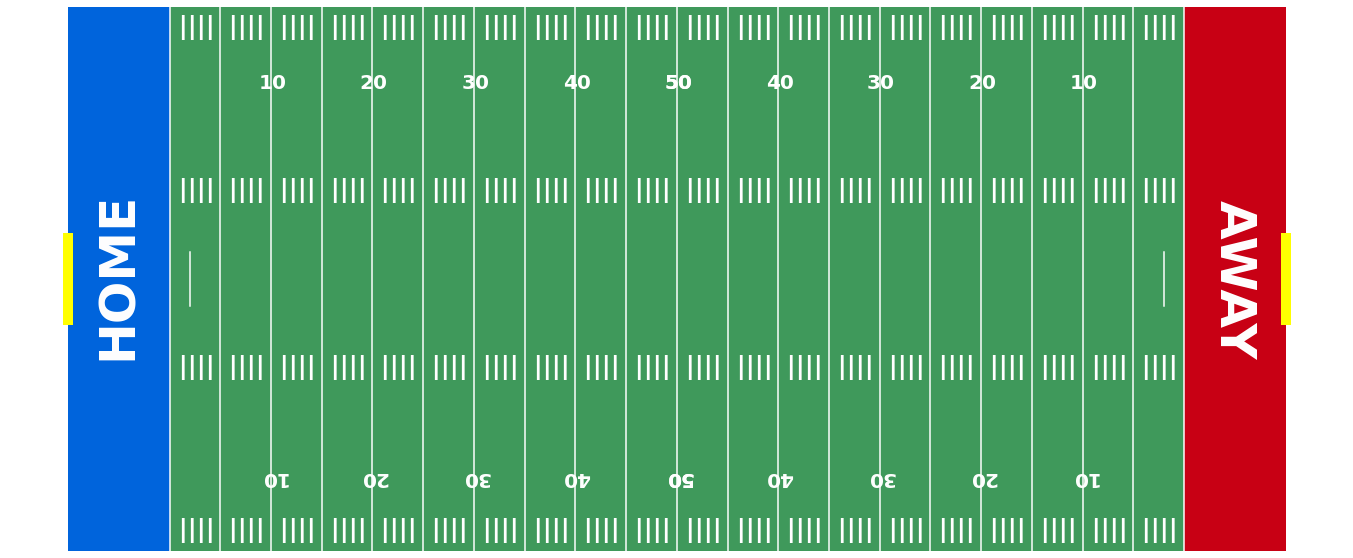

In [124]:
def drawfield():
    
    # Creating a new figure
    plt.figure(figsize = (24,10))

    # Getting current axis
    ax = plt.gca()

    # Creating a rectangle for the entire figure size and filling it with grass colour
    ax.add_patch(patches.Rectangle((0, 0), 24, 10, facecolor='#3f995b'))

    # Creating vertical lines
    for i in range(1, 22):
        plt.axvline(x = i+1, color='white')

    # Adding text to vertical lines
    k = 10
    for j in range(4, 22):
        if j%2 == 0 and j <= 12:
            #count = k + 10
            plt.text(x = j - 0.25, y = 0.85, s = k, color = "white", size = 20, weight = "bold")
            plt.text(x = j - 0.25, y = 0.125, s = k, color = "white", size = 20, weight = "bold", rotation=180)
            k = k + 10
        if j%2 == 0 and j > 11:
            k = k - 10
            plt.text(x = j - 0.25, y = 0.85, s = k, color = "white", size = 20, weight = "bold")
            plt.text(x = j - 0.25, y = 0.125, s = k, color = "white", size = 20, weight = "bold", rotation=180)

    # Adding yard markers in between the vertical lines
    for l in range(2, 22):
        plt.text(x = l, y = 0.95, s = " |||| ", color = "white", size = 25, weight = "bold")
        plt.text(x = l, y = 0.65, s = " |||| ", color = "white", size = 25, weight = "bold")
        plt.text(x = l, y = 0.325, s = " |||| ", color = "white", size = 25, weight = "bold")
        plt.text(x = l, y = 0.025, s = " |||| ", color = "white", size = 25, weight = "bold")
    
    # Adding home end zone
    ax.add_patch(patches.Rectangle((0, 0), 2, 10, facecolor='#0064dc'))
    plt.text(x = 0.5, y = 0.37, s = "HOME",color = "white", size = 50, weight="bold", rotation=90)

    # Adding away end zone
    ax.add_patch(patches.Rectangle((22, 0), 2, 10, facecolor='#c80014'))
    plt.text(x = 22.5, y = 0.37, s = "AWAY",color = "white", size = 50, weight="bold", rotation=270)
    
    # Adding spot points
    plt.axvline(x = 2.4, ymin = 0.45, ymax = 0.55, color = "white")
    plt.axvline(x = 21.6, ymin = 0.45, ymax = 0.55, color = "white")

    # Adding goalposts
    plt.axvline(x = 0, ymin = 0.425, ymax = 0.575, color = "yellow", linewidth = 10)
    plt.axvline(x = 24, ymin = 0.425, ymax = 0.575, color = "yellow", linewidth = 10)

    # Removing X and Y axes from the plot
    plt.axis('off')

    # Displaying plot
    plt.show()
    
drawfield()